In [1]:
import pysam
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Part 1

## TEST

**bwa index MG1655-K12.first10K.fasta**

**bwa mem MG1655-K12.first10K.fasta test_1.fastq test_2.fastq > alignment.sam**

**samtools view -S -b alignment.sam > alignment.bam**

56320 + 0 mapped (100.00% : N/A)


## Dataset 1

**bwa index ref.fasta**

**bwa mem ref.fasta frag.R1.fastq frag.R2.fastq > alignment.sam**

**samtools flagstat alignment.sam**

3424657 + 0 mapped (99.77% : N/A)

**samtools view -S -b alignment.sam > alignment.bam**

**samtools sort alignment.bam -o alignment_sorted.bam**

**samtools index alignment_sorted.bam**

**samtools view -f66 alignment_sorted.bam  | cut -f9 | awk '{print sqrt($0^2)}' > insert-sizes.txt**

In [13]:
Ref_path = '/media/data/NGS_2/dataset_1/ref.fasta'
#Ref_path = '/media/data/NGS_2/1_var/MG1655-K12.fasta'

In [14]:
bam_path = '/media/data/NGS_2/dataset_1/alignment_sorted.bam' 
#bam_path = '/media/data/NGS_2/1_var/alignment_sorted.bam' 

In [143]:
inserts_path = '/media/data/NGS_2/dataset_1/insert-sizes.txt'
#inserts_path = '/media/data/NGS_2/1_var/insert-sizes.txt'

In [80]:
samfile = pysam.AlignmentFile(bam_path, 'rb')
ref_seq = next(SeqIO.parse(Ref_path, 'fasta')).seq

In [105]:
matrix = pd.DataFrame(0, index=['A', 'C', 'G', 'T'], columns=['A', 'C', 'G', 'T'])
coverage = [0 for i in range(len(ref_seq))]

In [117]:
for pileupcolumn in samfile.pileup('Contig184'):
    
    ref_base = ref_seq[pileupcolumn.reference_pos]
    coverage[pileupcolumn.reference_pos] = pileupcolumn.get_num_aligned()
    
    for read_base in pileupcolumn.get_query_sequences():
        if (read_base.upper() in matrix.index) and (ref_base != read_base.upper()):
            matrix[read_base.upper()][ref_base] += 1

<function matplotlib.pyplot.show(close=None, block=None)>

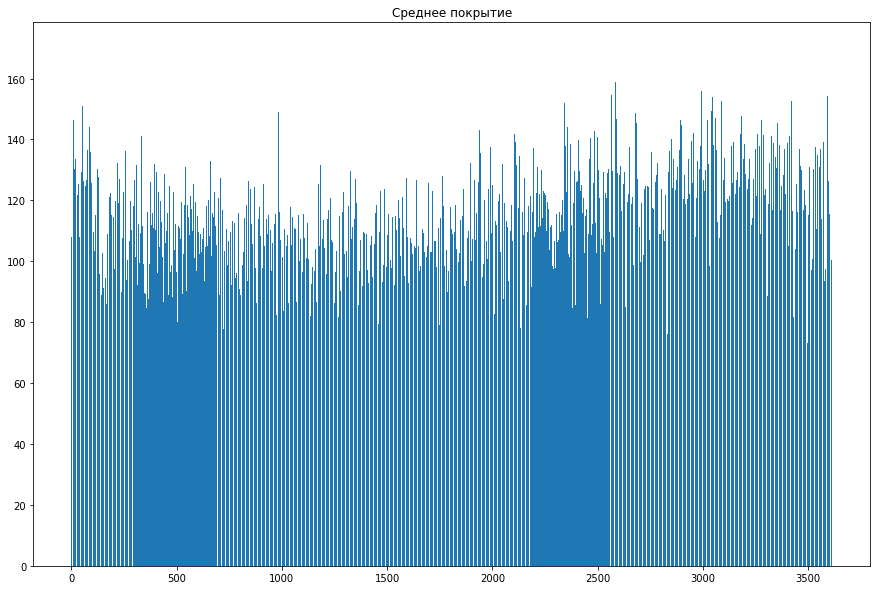

In [130]:
coverage_1000 = [np.mean(coverage[i:i+1000]) for i in range(0, len(coverage), 1000)]

plt.figure(figsize=(15, 10))
plt.bar([i for i in range(len(coverage_1000))], coverage_1000)
plt.title('Среднее покрытие')
plt.show

In [132]:
print('Среднее покрытие ' + str(np.mean(coverage)))
print('Доля покрытой области генома ' + str(np.count_nonzero(coverage)/len(coverage)))

Среднее покрытие 115.05082889556294
Доля покрытой области генома 1.0


In [17]:
inserts = []
with open(inserts_path, 'r') as input_file:
    for line in input_file:
        if line[0].isdigit():
            inserts.append(int(line[:line.find('\n')]))
            
inserts = np.asarray(inserts)

In [18]:
insert_count = Counter(inserts)
inserts_good = []
for ins_size in inserts:
    if insert_count[ins_size] > 10:
        inserts_good.append(ins_size)

In [142]:
mean = np.mean(inserts_good)
std = np.std(inserts_good)
quantile = np.quantile(inserts_good, [0.01, 0.96])

print('Средний размер вставки ' + str(mean))
print('Стандартное отклонение ' + str(std))
print('Интервал ' + str((quantile[0], quantile[1])))

Средний размер вставки 269.4202406507043
Стандартное отклонение 63.99606692840991
Интервал (162.0, 400.0)


<function matplotlib.pyplot.show(close=None, block=None)>

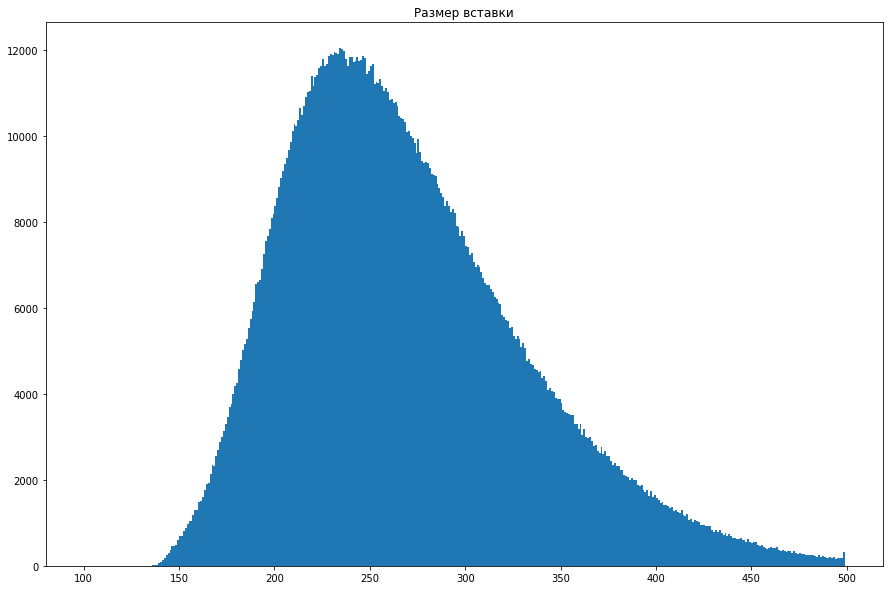

In [131]:
plt.figure(figsize=(15, 10))
plt.hist(inserts, range(100, 500))
plt.title('Размер вставки')
plt.show

### Матрица замен

In [136]:
matrix

,A,C,G,T
A,0,934672,504978,67987
C,397496,0,680971,149111
G,155718,715836,0,350430
T,77555,545981,930328,0


In [139]:
print('Средний процент ошибок ' + str(matrix.values.sum()*100/sum(coverage)) + ' %') 

Средний процент ошибок 1.3250687242006918 %


## Dataset 2

In [144]:
Ref_path = '/media/data/NGS_2/dataset_2/ref.fasta'

In [145]:
bam_path = '/media/data/NGS_2/dataset_2/alignment_sorted.bam' 

In [146]:
inserts_path = '/media/data/NGS_2/dataset_2/insert-sizes.txt'

In [147]:
samfile = pysam.AlignmentFile(bam_path, 'rb')
ref_seq = next(SeqIO.parse(Ref_path, 'fasta')).seq

In [148]:
matrix = pd.DataFrame(0, index=['A', 'C', 'G', 'T'], columns=['A', 'C', 'G', 'T'])
coverage = [0 for i in range(len(ref_seq))]

In [150]:
for pileupcolumn in samfile.pileup('Contig184'):
    
    ref_base = ref_seq[pileupcolumn.reference_pos]
    coverage[pileupcolumn.reference_pos] = pileupcolumn.get_num_aligned()
    
    for read_base in pileupcolumn.get_query_sequences():
        if (read_base.upper() in matrix.index) and (ref_base != read_base.upper()):
            matrix[read_base.upper()][ref_base] += 1

<function matplotlib.pyplot.show(close=None, block=None)>

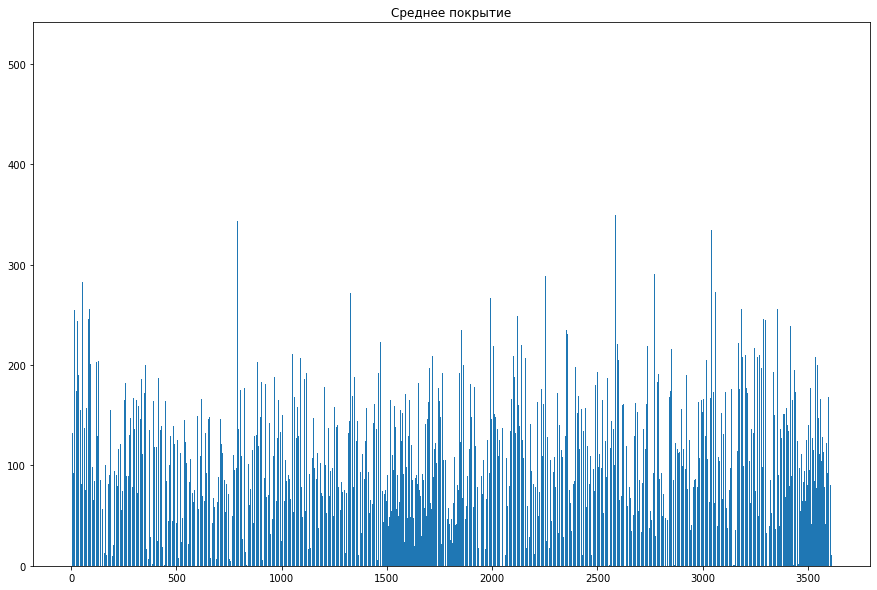

In [151]:
coverage_1000 = [np.mean(coverage[i:i+1000]) for i in range(0, len(coverage), 1000)]

plt.figure(figsize=(15, 10))
plt.bar([i for i in range(len(coverage_1000))], coverage_1000)
plt.title('Среднее покрытие')
plt.show

In [152]:
print('Среднее покрытие ' + str(np.mean(coverage)))
print('Доля покрытой области генома ' + str(np.count_nonzero(coverage)/len(coverage)))

Среднее покрытие 110.34473972410996
Доля покрытой области генома 0.8313431485721541


In [153]:
inserts = []
with open(inserts_path, 'r') as input_file:
    for line in input_file:
        if line[0].isdigit():
            inserts.append(int(line[:line.find('\n')]))
            
inserts = np.asarray(inserts)

In [154]:
insert_count = Counter(inserts)
inserts_good = []
for ins_size in inserts:
    if insert_count[ins_size] > 10:
        inserts_good.append(ins_size)

In [155]:
mean = np.mean(inserts_good)
std = np.std(inserts_good)
quantile = np.quantile(inserts_good, [0.01, 0.96])

print('Средний размер вставки ' + str(mean))
print('Стандартное отклонение ' + str(std))
print('Интервал ' + str((quantile[0], quantile[1])))

Средний размер вставки 7606.296733256685
Стандартное отклонение 1072.3667411946485
Интервал (5991.0, 9636.0)


<function matplotlib.pyplot.show(close=None, block=None)>

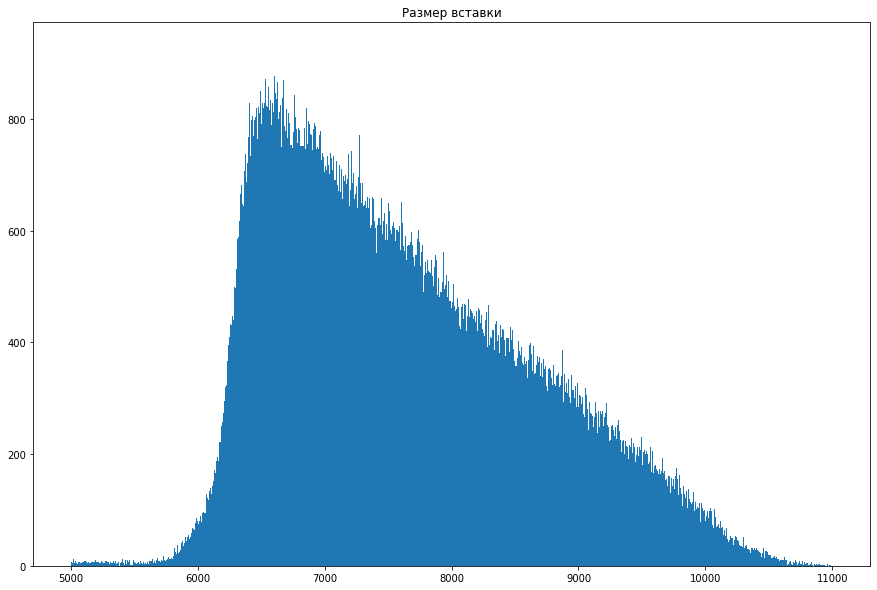

In [157]:
plt.figure(figsize=(15, 10))
plt.hist(inserts, range(5000, 11000))
plt.title('Размер вставки')
plt.show

### Матрица замен

In [158]:
matrix

,A,C,G,T
A,0,780645,460730,39437
C,129411,0,435701,67006
G,66385,429949,0,129894
T,39502,452411,792525,0


In [159]:
print('Средний процент ошибок ' + str(matrix.values.sum()*100/sum(coverage)) + ' %') 

Средний процент ошибок 0.9585464069249199 %


# Part 2

## B22-730

In [2]:
Ref_path = '/media/data/NGS_2/part_2/DH10B-K12.fasta'

In [3]:
bam_path = '/media/data/NGS_2/part_2/alignment_1_sorted.bam'

In [4]:
samfile = pysam.AlignmentFile(bam_path, 'rb')
ref_seq = next(SeqIO.parse(Ref_path, 'fasta')).seq

In [81]:
matrix = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])
q_matrix = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])
coverage = [0 for i in range(len(ref_seq))]
indel_dict = Counter()
indel_homop = 0

In [83]:
for pileupcolumn in samfile.pileup('gi|170079663|ref|NC_010473.1|', fastafile=pysam.FastaFile(Ref_path)):
    ref_base = ref_seq[pileupcolumn.reference_pos]
    coverage[pileupcolumn.reference_pos] = pileupcolumn.get_num_aligned()
    
    for read_base, qual, pos in zip(pileupcolumn.get_query_sequences(add_indels=True), pileupcolumn.get_query_qualities(), pileupcolumn.get_query_positions()):
        read_base_0 = read_base[0]
        if read_base_0.upper() != ref_base and read_base_0 == '*':
            q_matrix['-'][ref_base] += qual
        elif read_base_0.upper() != ref_base and read_base_0 != '*':
            matrix[ref_base][read_base_0.upper()] += 1
            q_matrix[ref_base][read_base_0.upper()] += qual
        if len(read_base) > 1:
            for i in range(2, len(read_base)):
                if read_base[i].isalpha():
                    n_indel = int(read_base[2:i])
                    break
            indel_dict[n_indel] += 1
            if n_indel > 1 and read_base[i] == read_base[i+1] or ref_seq[pos] == ref_seq[pos-1] or ref_seq[pos] == ref_seq[pos+1]:
                indel_homop += 1
            for ind_base in read_base[i:]:
                if read_base[1] == '-':
                    matrix['-'][ind_base.upper()] += 1
                else:
                    matrix[ind_base.upper()]['-'] += 1

<function matplotlib.pyplot.show(close=None, block=None)>

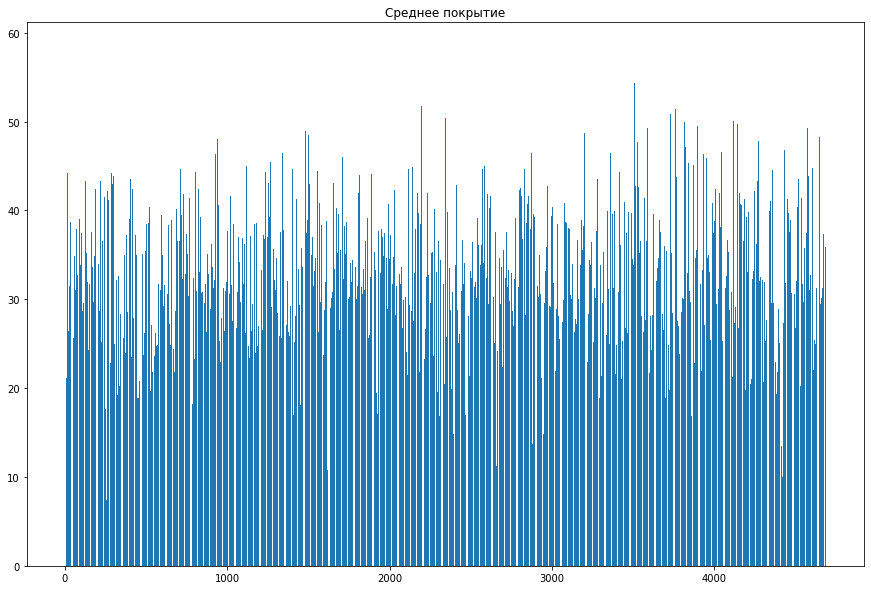

In [88]:
coverage_1000 = [np.mean(coverage[i:i+1000]) for i in range(0, len(coverage), 1000)]

plt.figure(figsize=(15, 10))
plt.bar([i for i in range(len(coverage_1000))], coverage_1000)
plt.title('Среднее покрытие')
plt.show

In [89]:
print('Среднее покрытие ' + str(np.mean(coverage)))
print('Доля покрытой области генома ' + str(np.count_nonzero(coverage)/len(coverage)))

Среднее покрытие 32.99516040610848
Доля покрытой области генома 0.9998574518841425


In [111]:
pd.DataFrame(indel_dict.values(), columns=['Длина индела\\\Количество инделов'], index=(indel_dict.keys()))

,Длина индела\\Количество инделов
1,673757
2,19040
4,484
3,1849
9,48
7,95
10,50
5,215
12,20
11,31


In [113]:
print('Количество инделов рядом с гомополимерами ', str(indel_homop*100/sum(indel_dict.values())), ' %' )

Количество инделов рядом с гомополимерами  45.885238763782574  %


### Матрица замен

In [84]:
matrix

,A,C,G,T,-
A,0,4519,11148,4856,98070
C,4266,0,3253,18604,57062
G,18411,3253,0,4364,57253
T,4943,11062,4580,0,99716
-,146296,58318,59072,149681,0


In [85]:
print('Средний процент ошибок ' + str(matrix.iloc[4:,:].values.sum()*100/sum(coverage)) + ' %') 

Средний процент ошибок 0.2673440838207557 %


### Статистика качества нуклеотидов

In [87]:
q_matrix/matrix

,A,C,G,T,-
A,NaN,18.695065,24.051220,18.102348,2.694912
C,18.790436,NaN,17.963726,26.090303,4.558217
G,26.173429,18.050108,NaN,18.719982,4.586223
T,18.172365,23.937534,18.536900,NaN,2.674987
-,0.000000,0.000000,0.000000,0.000000,NaN


## C24-698

In [114]:
Ref_path = '/media/data/NGS_2/part_2/DH10B-K12.fasta'

In [115]:
bam_path = '/media/data/NGS_2/part_2/alignment_2_sorted.bam'

In [116]:
samfile = pysam.AlignmentFile(bam_path, 'rb')
ref_seq = next(SeqIO.parse(Ref_path, 'fasta')).seq

In [117]:
matrix = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])
q_matrix = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])
coverage = [0 for i in range(len(ref_seq))]
indel_dict = Counter()
indel_homop = 0

In [118]:
for pileupcolumn in samfile.pileup('gi|170079663|ref|NC_010473.1|', fastafile=pysam.FastaFile(Ref_path)):
    ref_base = ref_seq[pileupcolumn.reference_pos]
    coverage[pileupcolumn.reference_pos] = pileupcolumn.get_num_aligned()
    
    for read_base, qual, pos in zip(pileupcolumn.get_query_sequences(add_indels=True), pileupcolumn.get_query_qualities(), pileupcolumn.get_query_positions()):
        read_base_0 = read_base[0]
        if read_base_0.upper() != ref_base and read_base_0 == '*':
            q_matrix['-'][ref_base] += qual
        elif read_base_0.upper() != ref_base and read_base_0 != '*':
            matrix[ref_base][read_base_0.upper()] += 1
            q_matrix[ref_base][read_base_0.upper()] += qual
        if len(read_base) > 1:
            for i in range(2, len(read_base)):
                if read_base[i].isalpha():
                    n_indel = int(read_base[2:i])
                    break
            indel_dict[n_indel] += 1
            if n_indel > 1 and read_base[i] == read_base[i+1] or ref_seq[pos] == ref_seq[pos-1] or ref_seq[pos] == ref_seq[pos+1]:
                indel_homop += 1
            for ind_base in read_base[i:]:
                if read_base[1] == '-':
                    matrix['-'][ind_base.upper()] += 1
                else:
                    matrix[ind_base.upper()]['-'] += 1

<function matplotlib.pyplot.show(close=None, block=None)>

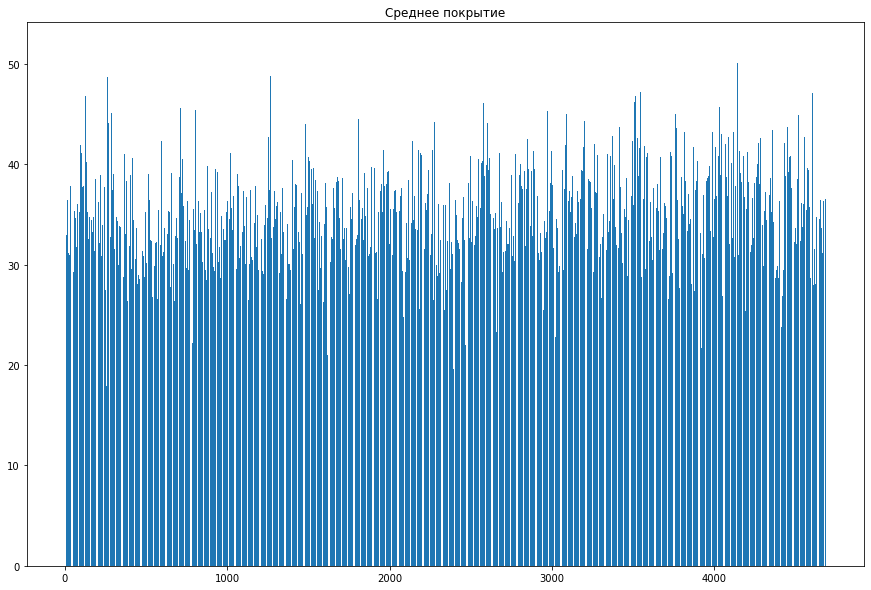

In [119]:
coverage_1000 = [np.mean(coverage[i:i+1000]) for i in range(0, len(coverage), 1000)]

plt.figure(figsize=(15, 10))
plt.bar([i for i in range(len(coverage_1000))], coverage_1000)
plt.title('Среднее покрытие')
plt.show

In [120]:
print('Среднее покрытие ' + str(np.mean(coverage)))
print('Доля покрытой области генома ' + str(np.count_nonzero(coverage)/len(coverage)))

Среднее покрытие 35.16499624317428
Доля покрытой области генома 0.9999963722784887


In [121]:
pd.DataFrame(indel_dict.values(), columns=['Длина индела\\\Количество инделов'], index=(indel_dict.keys()))

,Длина индела\\Количество инделов
1,373161
2,10614
10,13
3,795
4,156
15,3
5,62
6,41
9,19
17,4


In [122]:
print('Количество инделов рядом с гомополимерами ', str(indel_homop*100/sum(indel_dict.values())), ' %' )

Количество инделов рядом с гомополимерами  44.358261682728525  %


### Матрица замен

In [123]:
matrix

,A,C,G,T,-
A,0,3285,10013,3507,30081
C,2584,0,2198,18394,73218
G,18508,2187,0,2675,73568
T,3503,10079,3462,0,30781
-,61832,33778,33329,62746,0


In [124]:
print('Средний процент ошибок ' + str(matrix.iloc[4:,:].values.sum()*100/sum(coverage)) + ' %') 

Средний процент ошибок 0.11632219071304893 %


### Статистика качества нуклеотидов

In [125]:
q_matrix/matrix

,A,C,G,T,-
A,NaN,20.487367,25.588235,19.939549,2.643828
C,19.821207,NaN,18.558690,26.840437,3.490590
G,26.861519,18.760860,NaN,19.761121,3.441850
T,19.876677,25.460462,20.450029,NaN,2.535070
-,0.000000,0.000000,0.000000,0.000000,NaN
